In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def VaR(Position, sigma, Quantile):
    return Position*sigma*scipy.stats.norm.ppf(Quantile)

In [4]:
VaR(1000,0.05,0.95)

82.24268134757361

In [5]:
w1 = 0.5
w2 = 0.5
sigma1 = 0.07
sigma2 = 0.03
corr = 0.4

In [10]:
portvar = w1**2*sigma1**2+w2**2*sigma2**2+2*(w1*w2*sigma1*sigma2*corr)
portvol = np.sqrt(portvar)

In [11]:
portvol

0.043243496620879306

In [12]:
VaR(1000,portvol,.95)

71.12922225891705

In [13]:
VaR1 = VaR(1000*w1,sigma1,.95)
VaR2 = VaR(1000*w2,sigma2,.95)

In [53]:
vector = np.array([VaR1,VaR2])
vector

array([57.56987694, 24.6728044 ])

In [25]:
corrmatrix = np.array([[1,corr],[corr,1]]) 

In [26]:
corrmatrix

array([[1. , 0.4],
       [0.4, 1. ]])

In [27]:
np.sqrt(np.dot(np.dot(vector,corrmatrix),vector))

71.12922225891707

In [28]:
import pandas_datareader.data as reader
import datetime as dt

In [47]:
end = dt.datetime.now()
start = dt.datetime(end.year-1,end.month,end.day)
df = reader.get_data_yahoo(['AAPL','MSFT','TSLA'], start,end)['Adj Close']
df.tail()

Symbols,AAPL,MSFT,TSLA
Date,,,
2021-03-26,121.209999,236.479996,618.710022
2021-03-29,121.389999,235.240005,611.289978
2021-03-30,119.900002,231.850006,635.619995
2021-03-31,122.150002,235.770004,667.929993
2021-04-01,123.000000,242.350006,661.750000


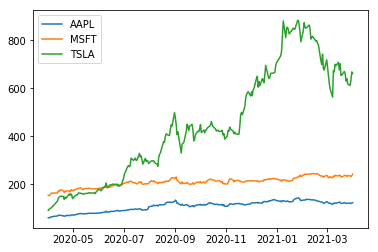

In [42]:
plt.plot(df)
plt.legend(df)
plt.show()

In [34]:
returns = np.log(1+df.pct_change())

In [35]:
returns.head()

Symbols,AAPL,MSFT,TSLA
Date,,,
2020-04-02,NaN,NaN,NaN
2020-04-03,-0.014476,-0.009253,0.054675
2020-04-06,0.083640,0.071732,0.072765
2020-04-07,-0.011650,-0.010829,0.055039
2020-04-08,0.025272,0.009981,0.006196


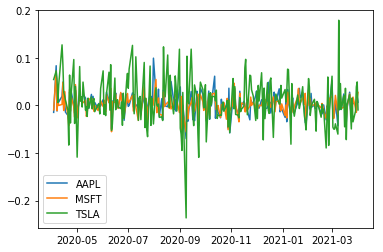

In [43]:
plt.plot(returns)
plt.legend(returns)
plt.show()

In [45]:
returns.std()

Symbols
AAPL    0.023046
MSFT    0.018867
TSLA    0.047789
dtype: float64

In [46]:
Position = df.iloc[-1]
Position

Symbols
AAPL    123.000000
MSFT    242.350006
TSLA    661.750000
Name: 2021-04-01 00:00:00, dtype: float64

In [49]:
VaRarray= []
for i in range(len(Position)):
    VaRarray.append(VaR(Position[i],returns.std()[i],0.95))
    

In [50]:
VaRarray

[4.662501777411397, 7.520824216443971, 52.01714814904656]

In [51]:
vector = np.array(VaRarray)

In [52]:
returns.corr()

Symbols,AAPL,MSFT,TSLA
Symbols,,,
AAPL,1.000000,0.727711,0.503290
MSFT,0.727711,1.000000,0.507734
TSLA,0.503290,0.507734,1.000000


In [57]:
np.sqrt(np.dot(np.dot(vector,returns.corr()),vector))

58.96193347172579